# Decision Tree - 분류

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 실습용 데이터 설정
* iris.csv

In [4]:
import seaborn as sns

DF = sns.load_dataset('iris')

* pandas DataFrame

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


# I. 탐색적 데이터 분석

> ## 1) 빈도분석

In [10]:
DF.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

> ## 2) 분포 시각화

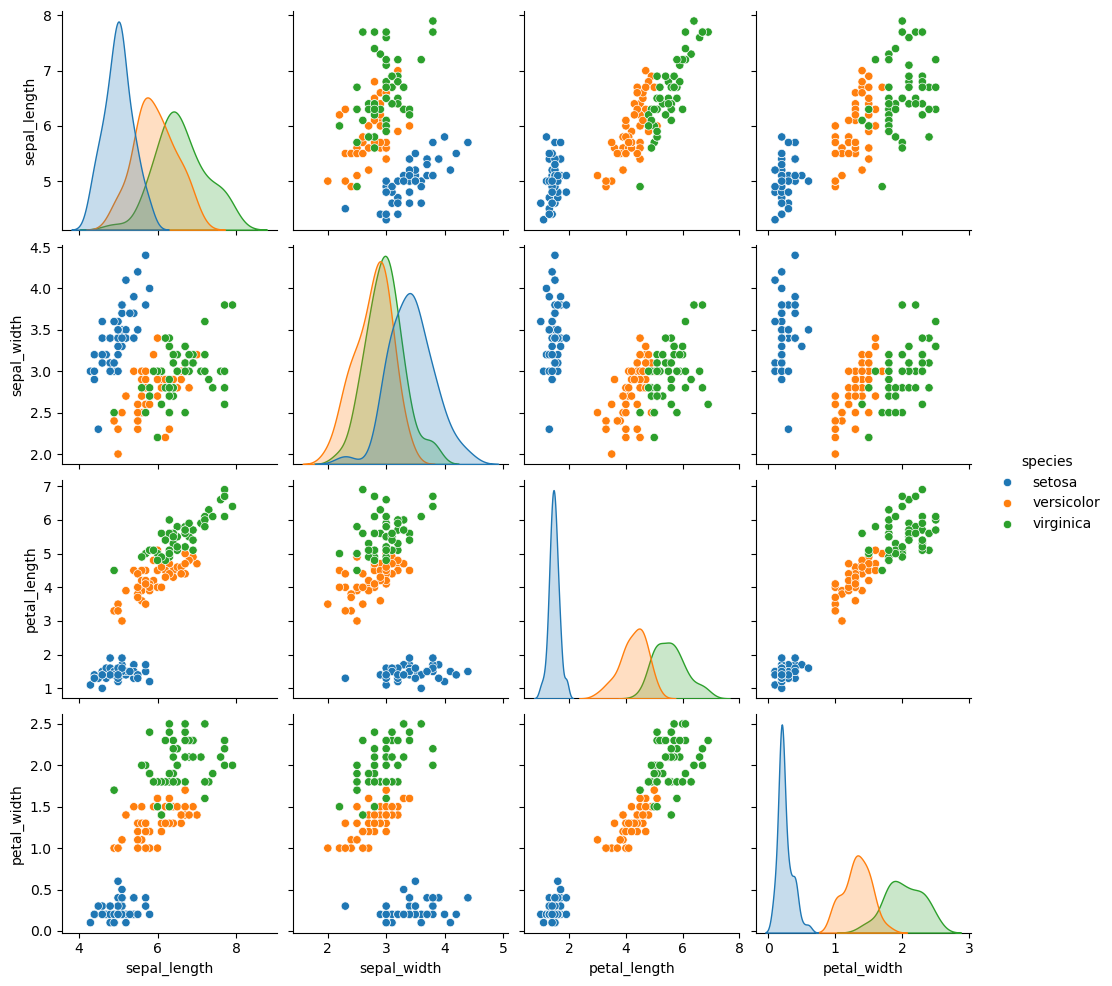

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data = DF,
             hue = 'species')
plt.show()

# II. Data Preprocessing

> ## 1) Data Set

In [15]:
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

> ## 2) train_test_split( )

* 7 : 3

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


# III. Modeling

> ## 1) Model 학습

In [21]:
# !conda install python-graphviz -y

In [22]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

## 2) Model Visualization
* graphviz :
    * 주피터 사용자 : conda install python-graphviz 
        * pip로 설치하면 경로 문제 발생할 수 있으므로 conda로 설치 권장
    * 코랩 사용자 : 기설치, 바로 실행가능

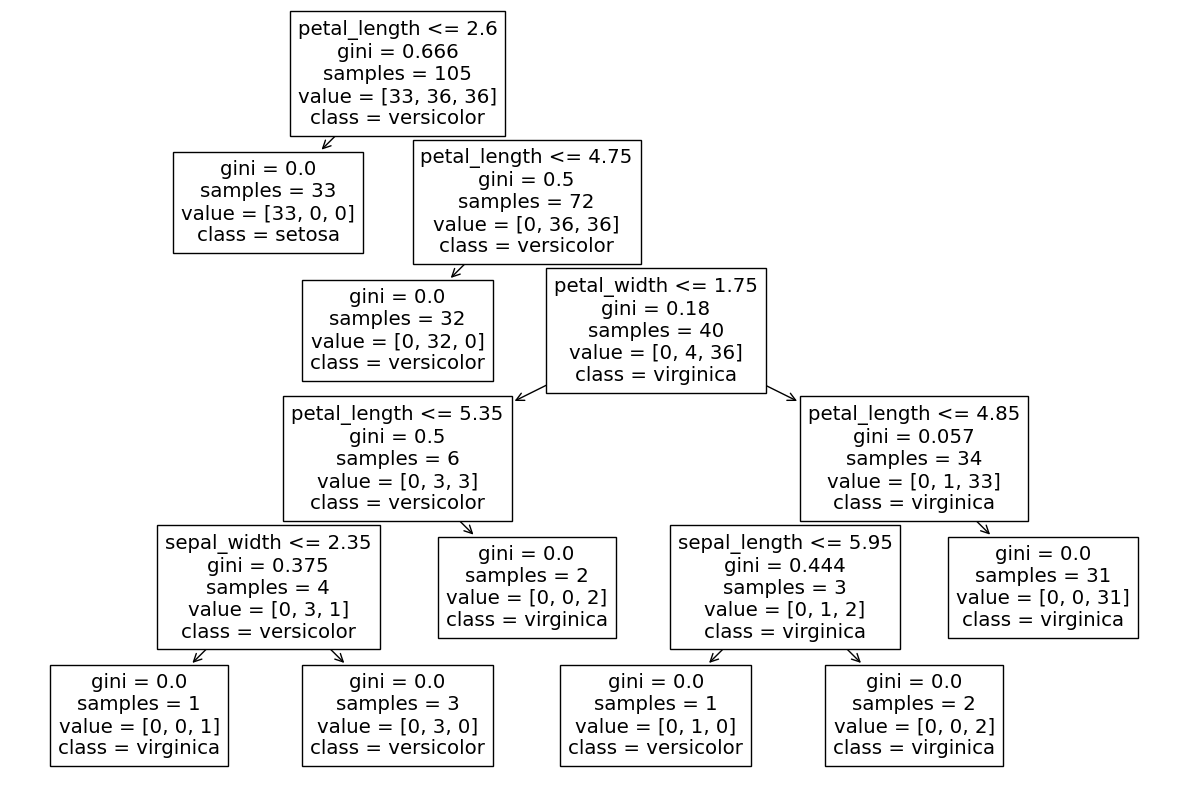

In [24]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))

plot_tree(Model_dt,          
          feature_names=X.columns, ## 박스에 변수 이름 표시  
          class_names=Model_dt.classes_, ## 클래스 이름(범주 이름)         
         )
plt.show()

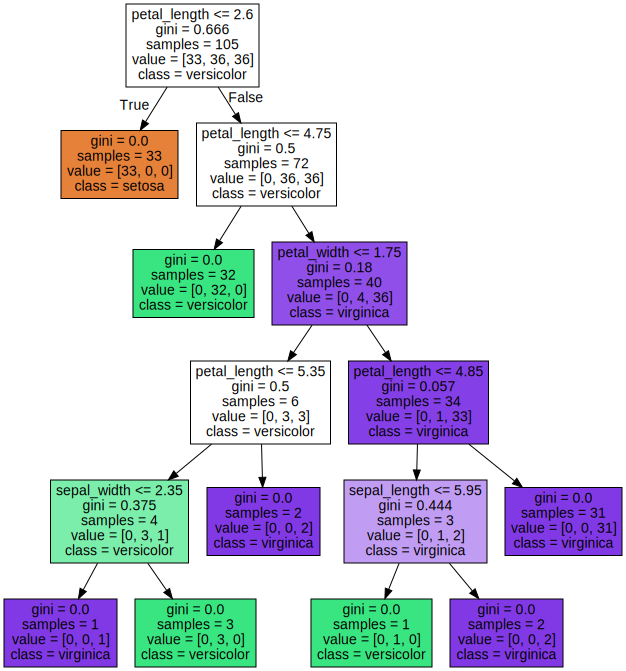

In [25]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['setosa', 'versicolor', 'virginica']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

> ## 3) 예측값 생성

In [27]:
y_hat = Model_dt.predict(X_test)

y_hat

array(['setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica'],
      dtype=object)

> ## 4) Model 평가

* Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  2, 12]], dtype=int64)

* Scores

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['setosa', 'versicolor', 'virginica'],
                            digits = 5))

              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        17
  versicolor    0.87500   1.00000   0.93333        14
   virginica    1.00000   0.85714   0.92308        14

    accuracy                        0.95556        45
   macro avg    0.95833   0.95238   0.95214        45
weighted avg    0.96111   0.95556   0.95533        45



# IV. Pruning(가지치기)

* min_samples_split : 분할을 위한 최소한의 샘플데이터 개수
* min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플데이터 개수
* max_leaf_nodes : 말단 노드의 최대 개수
* max_depth : 트리모델의 최대 깊이를 지정

> ## 1) Model Pruning

In [36]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 3,
                                  random_state = 2045)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2045)

> ## 2) Model Visualization

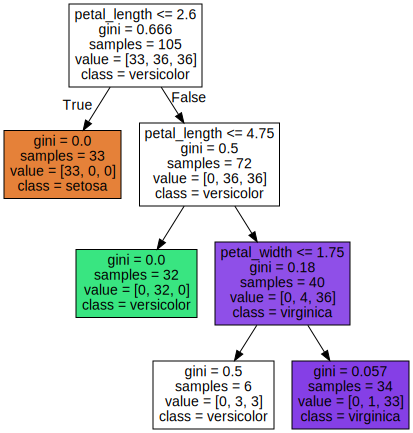

In [38]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['setosa', 'versicolor', 'virginica']),
                                feature_names = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width']),
                                filled = True))

> ## 3) Model 평가

* Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_hat = Model_pr.predict(X_test)

print(confusion_matrix(y_test, y_hat))

[[17  0  0]
 [ 0 14  0]
 [ 0  2 12]]


* Scores

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat, 
                            target_names = ['setosa', 'versicolor', 'virginica'],
                            digits = 5))

              precision    recall  f1-score   support

      setosa    1.00000   1.00000   1.00000        17
  versicolor    0.87500   1.00000   0.93333        14
   virginica    1.00000   0.85714   0.92308        14

    accuracy                        0.95556        45
   macro avg    0.95833   0.95238   0.95214        45
weighted avg    0.96111   0.95556   0.95533        45



# V. Feature Importance

> ## 1) Feature Importance 확인

In [46]:
Model_pr.feature_importances_

array([0.        , 0.        , 0.96524977, 0.03475023])

> ## 2) Feature Importance 시각화

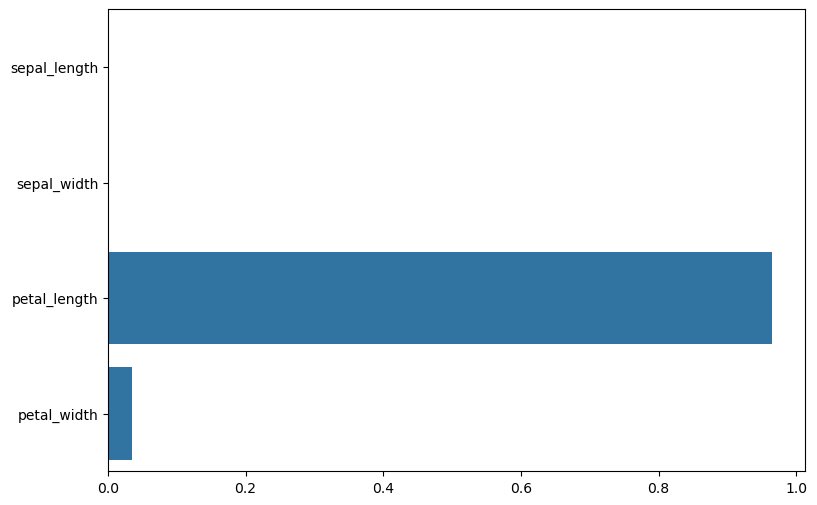

In [48]:
plt.figure(figsize = (9, 6))
sns.barplot(x = Model_pr.feature_importances_,
            y =['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# The End